In [5]:
import torch

if torch.cuda.is_available():
    print("✅ GPU is available!")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"Using device: {torch.cuda.current_device()}")
else:
    print("❌ GPU not available. Running on CPU.")

✅ GPU is available!
GPU Name: NVIDIA GeForce GTX 1650
Number of GPUs: 1
Using device: 0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the CSV file
df = pd.read_csv('Tire_Data_With_Lifespan.csv')

# Show the first few rows
df.head()

,Internal Tire Pressure (PSI),External Load (lbs),TKPH,Ambient Temperature (°C),Speed (km/h),Road Conditions,Lifespan (km)
0,63.708611,7117.261764,124.728164,19.980215,92.999831,Smooth,40316.010087
1,115.564288,8154.663572,116.582419,34.804806,38.451200,Smooth,62582.917808
2,95.879455,13109.116112,85.230783,23.760007,54.663969,Gravel,26199.045154
3,83.879264,6420.057019,171.453334,-5.001845,86.328064,Off-road,31482.348271
4,44.041678,13305.445903,145.324832,1.134814,68.208934,Gravel,20539.616919


In [11]:
# Shape and data types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Null value check
print("\nMissing Values:\n", df.isnull().sum())

Shape: (5000, 7)

Data Types:
 Internal Tire Pressure (PSI)    float64
External Load (lbs)             float64
TKPH                            float64
Ambient Temperature (°C)        float64
Speed (km/h)                    float64
Road Conditions                  object
Lifespan (km)                   float64
dtype: object

Missing Values:
 Internal Tire Pressure (PSI)    0
External Load (lbs)             0
TKPH                            0
Ambient Temperature (°C)        0
Speed (km/h)                    0
Road Conditions                 0
Lifespan (km)                   0
dtype: int64


In [13]:
# Clean and standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,internal_tire_pressure_(psi),external_load_(lbs),tkph,ambient_temperature_(°c),speed_(km/h),road_conditions,lifespan_(km)
0,63.708611,7117.261764,124.728164,19.980215,92.999831,Smooth,40316.010087
1,115.564288,8154.663572,116.582419,34.804806,38.451200,Smooth,62582.917808
2,95.879455,13109.116112,85.230783,23.760007,54.663969,Gravel,26199.045154
3,83.879264,6420.057019,171.453334,-5.001845,86.328064,Off-road,31482.348271
4,44.041678,13305.445903,145.324832,1.134814,68.208934,Gravel,20539.616919


In [15]:
# Drop or fill missing values depending on severity
df = df.dropna()  # or df.fillna(method='ffill') for forward fill

# Show updated null counts
df.isnull().sum()

internal_tire_pressure_(psi)    0
external_load_(lbs)             0
tkph                            0
ambient_temperature_(°c)        0
speed_(km/h)                    0
road_conditions                 0
lifespan_(km)                   0
dtype: int64

In [17]:
# Convert 'road_conditions' to categorical
df['road_conditions'] = df['road_conditions'].str.strip().str.lower()

# Use one-hot encoding
df = pd.get_dummies(df, columns=['road_conditions'], drop_first=True)
df.head()

,internal_tire_pressure_(psi),external_load_(lbs),tkph,ambient_temperature_(°c),speed_(km/h),lifespan_(km),road_conditions_off-road,road_conditions_smooth,road_conditions_wet
0,63.708611,7117.261764,124.728164,19.980215,92.999831,40316.010087,False,True,False
1,115.564288,8154.663572,116.582419,34.804806,38.451200,62582.917808,False,True,False
2,95.879455,13109.116112,85.230783,23.760007,54.663969,26199.045154,False,False,False
3,83.879264,6420.057019,171.453334,-5.001845,86.328064,31482.348271,True,False,False
4,44.041678,13305.445903,145.324832,1.134814,68.208934,20539.616919,False,False,False


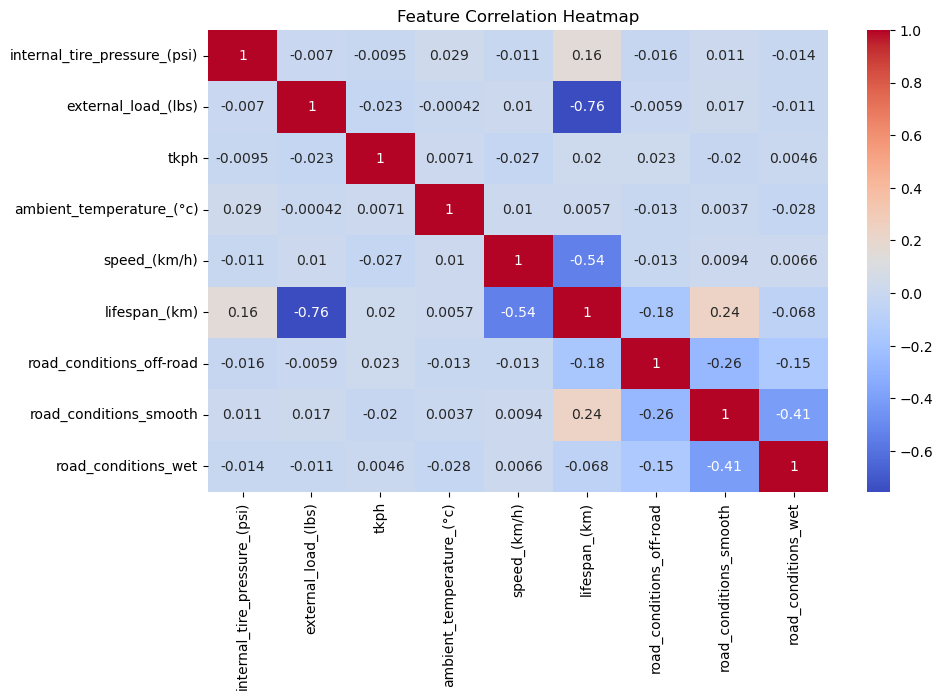

In [19]:
# Check correlation with lifespan
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Features to scale (excluding lifespan)
features_to_scale = df.drop(columns=['lifespan_(km)']).columns

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.head()

,internal_tire_pressure_(psi),external_load_(lbs),tkph,ambient_temperature_(°c),speed_(km/h),lifespan_(km),road_conditions_off-road,road_conditions_smooth,road_conditions_wet
0,-0.422272,-0.342632,-0.439341,-0.027849,0.766234,40316.010087,-0.314101,1.194155,-0.486524
1,1.567248,-0.063208,-0.579427,0.830719,-1.123142,62582.917808,-0.314101,1.194155,-0.486524
2,0.812010,1.271273,-1.118595,0.191058,-0.561588,26199.045154,-0.314101,-0.837412,-0.486524
3,0.351605,-0.530424,0.364213,-1.474689,0.535147,31482.348271,3.183686,-0.837412,-0.486524
4,-1.176823,1.324154,-0.085130,-1.119283,-0.092437,20539.616919,-0.314101,-0.837412,-0.486524


In [57]:
df = pd.read_csv('Tire_Data_With_Lifespan.csv')

# Show the first few rows
df.head()

,Internal Tire Pressure (PSI),External Load (lbs),TKPH,Ambient Temperature (°C),Speed (km/h),Road Conditions,Lifespan (km)
0,63.708611,7117.261764,124.728164,19.980215,92.999831,Smooth,40316.010087
1,115.564288,8154.663572,116.582419,34.804806,38.451200,Smooth,62582.917808
2,95.879455,13109.116112,85.230783,23.760007,54.663969,Gravel,26199.045154
3,83.879264,6420.057019,171.453334,-5.001845,86.328064,Off-road,31482.348271
4,44.041678,13305.445903,145.324832,1.134814,68.208934,Gravel,20539.616919


In [96]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import re
from sklearn.model_selection import train_test_split
import random

# Load CSV
csv_path = r"C:\Users\jayes\ML Projects\WT_CP\Tire_Data_With_Lifespan.csv"
csv_data = pd.read_csv(csv_path)

# Define image directories
base_dir = r"C:\Users\jayes\ML Projects\WT_CP\Digital images of defective and good condition tyres"
good_dir = os.path.join(base_dir, "good")
defective_dir = os.path.join(base_dir, "defective")

# Create a list to store image data
image_data = []

# Expected image shape
TARGET_SHAPE = (224, 224, 3)

# Load and preprocess images with random shuffling
all_images = []  # Temporary list to hold all image paths and labels
for folder in [good_dir, defective_dir]:
    for img_name in os.listdir(folder):
        if img_name.endswith('.jpg') or img_name.endswith('.png'):
            img_path = os.path.join(folder, img_name)
            all_images.append((img_path, folder))

# Shuffle the list of image paths
random.shuffle(all_images)

# Process shuffled images
for img_path, folder in all_images:
    img_name = os.path.basename(img_path)
    try:
        img = Image.open(img_path).resize((224, 224)).convert('RGB')  # Convert to RGB
        img_array = np.array(img) / 255.0  # Normalize
        if img_array.shape == TARGET_SHAPE:  # Check shape consistency
            # Extract numeric ID from filename (e.g., 'good (1).jpg' -> 1)
            match = re.search(r'\((\d+)\)', img_name)
            tyre_id = int(match.group(1)) if match else None
            if tyre_id is not None:
                image_data.append({'tyre_id': tyre_id, 'image': img_array, 'label': folder})
        else:
            print(f"Skipping {img_name}: Shape {img_array.shape} does not match {TARGET_SHAPE}")
    except Exception as e:
        print(f"Error processing {img_name}: {e}")

image_df = pd.DataFrame(image_data)

# Aggregate image data for duplicate tyre_ids by averaging images
image_agg = image_df.groupby('tyre_id').agg({
    'image': lambda x: np.mean(np.stack(x), axis=0),  # Average image arrays
    'label': 'first'  # Take the first label (e.g., 'good' or 'defective')
}).reset_index()

# Align CSV and image data using tyre_id
csv_data['tyre_id'] = csv_data.index  # Use index as tyre_id
merged_data = pd.merge(csv_data, image_agg, on='tyre_id', how='inner')

# Save merged data
merged_data_csv = merged_data.drop(columns=['image'])  # Remove image column for CSV save
merged_data_csv.to_csv(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_data.csv", index=False)
np.save(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_images.npy", merged_data['image'].values)

# Split features and target
X_images = np.array(merged_data['image'].tolist())
X_csv = merged_data[['Internal Tire Pressure (PSI)', 'External Load (lbs)', 'TKPH', 'Ambient Temperature (°C)', 'Speed (km/h)']].values
y = merged_data['Lifespan (km)'].values

# Train-test split
X_train_img, X_test_img, X_train_csv, X_test_csv, y_train, y_test = train_test_split(
    X_images, X_csv, y, test_size=0.2, random_state=42
)

print("Data preparation complete.")

Data preparation complete.


In [89]:
print(f"Number of images processed: {len(image_data)}")
print(f"Merged data shape: {merged_data.shape}")

Number of images processed: 1856
Merged data shape: (1028, 10)


In [105]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# CNN for image data
img_input = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(img_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
cnn_output = Dense(5)(x)  # Changed to 5 units to match X_train_csv shape

cnn_model = Model(img_input, cnn_output)

# Random Forest for CSV data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

print("Base models defined.")

Base models defined.


# Ensemble training

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.optimizers import Adam

# Train CNN
cnn_model.compile(optimizer=Adam(), loss='mse')
cnn_model.fit(X_train_img, X_train_csv, epochs=10, batch_size=32, validation_split=0.2)

# Get CNN predictions
cnn_train_pred = cnn_model.predict(X_train_img)
cnn_test_pred = cnn_model.predict(X_test_img)

# Combine features (CNN output + CSV features)
X_train_combined = np.hstack((cnn_train_pred, X_train_csv))
X_test_combined = np.hstack((cnn_test_pred, X_test_csv))

# Train meta-learner (GradientBoosting)
meta_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
meta_model.fit(X_train_combined, y_train)

# Evaluate
y_pred = meta_model.predict(X_test_combined)
print(f"Ensemble Model RMSE: {np.sqrt(np.mean((y_pred - y_test) ** 2))}")

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 452ms/step - loss: 13564963.0000 - val_loss: 4427353.0000
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 385ms/step - loss: 3770072.7500 - val_loss: 3567705.5000
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 418ms/step - loss: 3615456.5000 - val_loss: 3768154.7500
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 404ms/step - loss: 3241091.5000 - val_loss: 3243906.2500
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 423ms/step - loss: 3291709.5000 - val_loss: 3217480.2500
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 442ms/step - loss: 3221663.5000 - val_loss: 3211677.7500
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 438ms/step - loss: 3259181.7500 - val_loss: 3139484.2500
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 435ms/step - loss: 3236645.5000 - val_loss: 3178857.0000
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 463ms/step - loss: 3267861.7500 - val_loss: 3093890.0000
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 409ms/step - loss: 3032768.0000 - val_loss: 3066994.7500
26/26 ━━━━━━━━━━

In [109]:
baseline_rmse = np.sqrt(np.mean((y_test - np.mean(y_train)) ** 2))
print(f"Baseline RMSE: {baseline_rmse}")

Baseline RMSE: 17038.10335071785


In [111]:
cnn_model.fit(X_train_img, X_train_csv, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 425ms/step - loss: 2902975.0000 - val_loss: 3133097.0000
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 384ms/step - loss: 3047510.5000 - val_loss: 3076733.7500
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 396ms/step - loss: 3116155.7500 - val_loss: 3095723.7500
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 381ms/step - loss: 3155083.2500 - val_loss: 2979967.5000
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 408ms/step - loss: 3073541.2500 - val_loss: 3063435.5000
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 430ms/step - loss: 3108284.5000 - val_loss: 2983013.0000
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 454ms/step - loss: 3033207.0000 - val_loss: 2953588.0000
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 422ms/step - loss: 2928888.2500 - val_loss: 2945546.2500
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 435ms/step - loss: 2800385.0000 - val_loss: 3011494.5000
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 435ms/step - loss: 3108752.5000 - val_loss: 2938849.0000
Epoch 11/20
21/21 

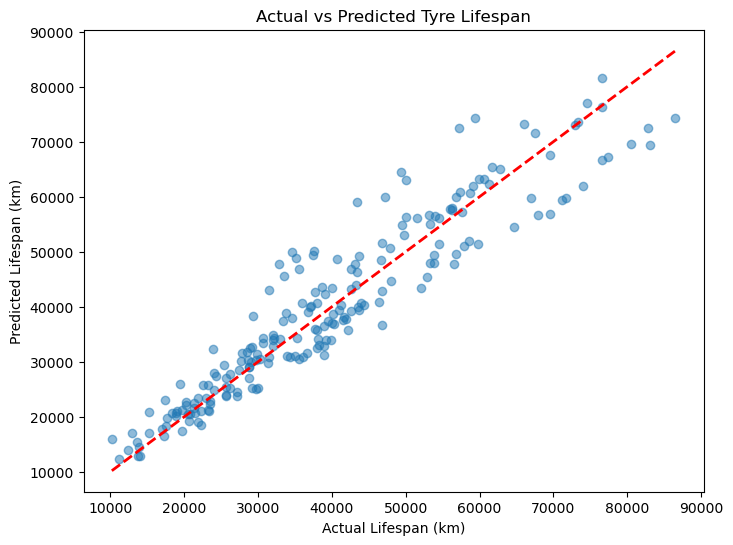

Training and visualization complete.


In [115]:
import matplotlib.pyplot as plt

# Plot predicted vs actual lifespan
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Lifespan (km)')
plt.ylabel('Predicted Lifespan (km)')
plt.title('Actual vs Predicted Tyre Lifespan')
plt.show()

print("Training and visualization complete.")

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 486ms/step - loss: 13976127.0000 - val_loss: 4415460.0000
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 409ms/step - loss: 3871112.7500 - val_loss: 3337252.5000
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 395ms/step - loss: 3721382.2500 - val_loss: 3177598.5000
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 413ms/step - loss: 3439098.5000 - val_loss: 3148486.7500
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 417ms/step - loss: 3240199.0000 - val_loss: 3150119.2500
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 426ms/step - loss: 3118013.2500 - val_loss: 3188580.0000
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 427ms/step - loss: 3468495.2500 - val_loss: 3343474.0000
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 439ms/step - loss: 3510179.0000 - val_loss: 3186225.7500
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 393ms/step - loss: 3186459.5000 - val_loss: 3067124.2500
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 426ms/step - loss: 3179291.5000 - val_loss: 2963139.7500
Epoch 11/20
21/21

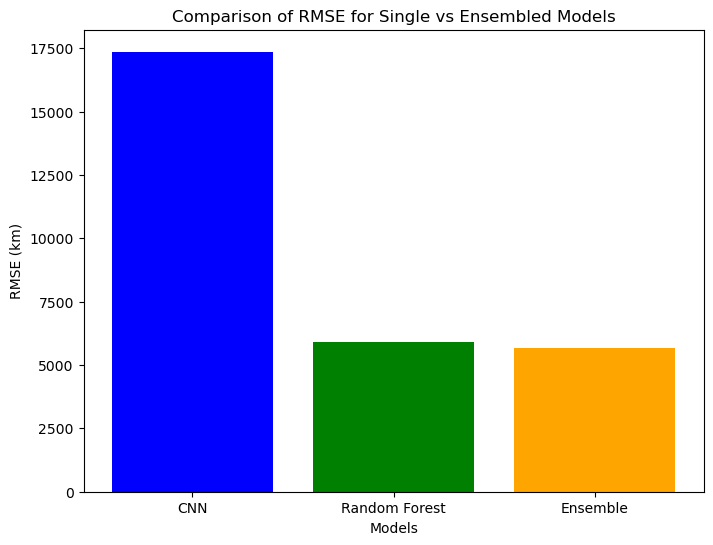

Training and visualization complete.


In [117]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Define CNN model (updated with additional layers)
img_input = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(img_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)  # Added layer
x = MaxPooling2D((2, 2))(x)  # Added layer
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
cnn_output = Dense(5)(x)  # Output 5 units to match X_train_csv shape

cnn_model = Model(img_input, cnn_output)

# Train CNN
cnn_model.compile(optimizer=Adam(), loss='mse')
cnn_model.fit(X_train_img, X_train_csv, epochs=20, batch_size=32, validation_split=0.2)  # Increased epochs to 20

# Get CNN predictions
cnn_train_pred = cnn_model.predict(X_train_img)
cnn_test_pred = cnn_model.predict(X_test_img)

# Train Random Forest (single model)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_csv, y_train)
rf_test_pred = rf_model.predict(X_test_csv)

# Combine features for ensemble
X_train_combined = np.hstack((cnn_train_pred, X_train_csv))
X_test_combined = np.hstack((cnn_test_pred, X_test_csv))

# Train meta-learner (Gradient Boosting)
meta_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
meta_model.fit(X_train_combined, y_train)

# Get ensemble predictions
y_pred = meta_model.predict(X_test_combined)

# Calculate RMSE for all models
cnn_rmse = np.sqrt(np.mean((cnn_test_pred.dot(np.linalg.pinv(X_train_csv.T @ X_train_csv) @ X_train_csv.T @ y_train) - y_test) ** 2))
rf_rmse = np.sqrt(np.mean((rf_test_pred - y_test) ** 2))
ensemble_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

print(f"CNN Model RMSE: {cnn_rmse}")
print(f"Random Forest Model RMSE: {rf_rmse}")
print(f"Ensemble Model RMSE: {ensemble_rmse}")

# Approximate accuracy (within 10% tolerance)
tolerance = 0.1
accuracy = np.mean(np.abs((y_pred - y_test) / y_test) < tolerance) * 100
print(f"Ensemble Model Accuracy (within 10% tolerance): {accuracy:.2f}%")

# Head of actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nHead of Actual vs Predicted Values:")
print(results_df.head())

# Bar graph comparison of RMSE for single vs ensembled models
models = ['CNN', 'Random Forest', 'Ensemble']
rmse_values = [cnn_rmse, rf_rmse, ensemble_rmse]

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('RMSE (km)')
plt.title('Comparison of RMSE for Single vs Ensembled Models')
plt.show()

print("Training and visualization complete.")

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 560ms/step - loss: 12996459.0000 - val_loss: 3636361.0000
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 474ms/step - loss: 3715397.5000 - val_loss: 3264657.5000
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 471ms/step - loss: 3480502.7500 - val_loss: 3506835.7500
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 474ms/step - loss: 3528048.5000 - val_loss: 3160886.0000
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 481ms/step - loss: 3217649.5000 - val_loss: 3219046.7500
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 510ms/step - loss: 3180673.2500 - val_loss: 3076166.5000
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 516ms/step - loss: 3089760.0000 - val_loss: 3078733.5000
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 525ms/step - loss: 3071458.7500 - val_loss: 3382559.7500
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 485ms/step - loss: 3387647.5000 - val_loss: 3007995.0000
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 475ms/step - loss: 3168088.5000 - val_loss: 3150905.0000
Epoch 11

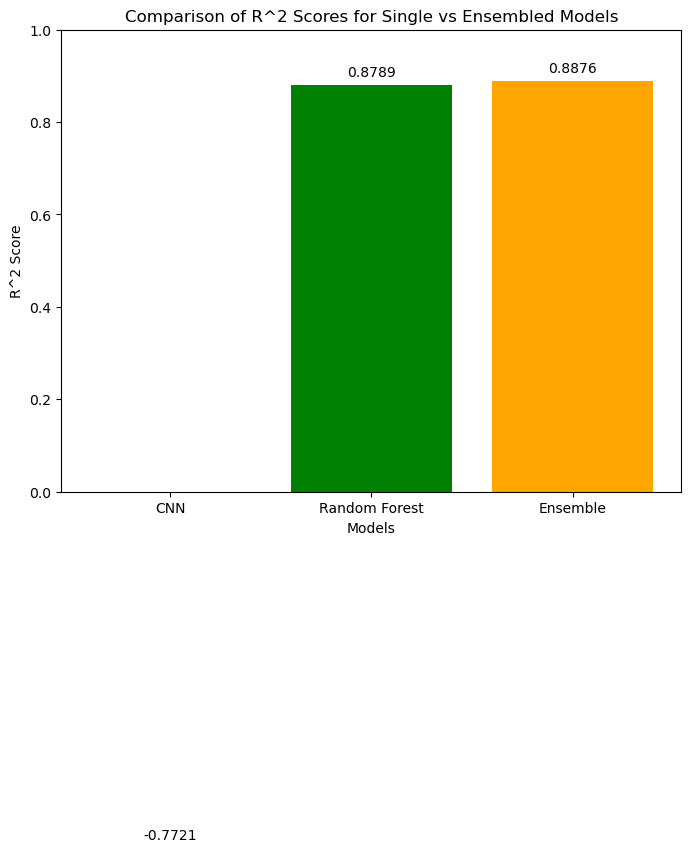

Training and visualization complete.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load saved data
merged_data_csv = pd.read_csv(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_data.csv")
merged_images = np.load(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_images.npy", allow_pickle=True)
merged_data = merged_data_csv.assign(image=merged_images.tolist())

# Split features and target
X_images = np.array(merged_data['image'].tolist())
X_csv = merged_data[['Internal Tire Pressure (PSI)', 'External Load (lbs)', 'TKPH', 'Ambient Temperature (°C)', 'Speed (km/h)']].values
y = merged_data['Lifespan (km)'].values

# Train-test split
X_train_img, X_test_img, X_train_csv, X_test_csv, y_train, y_test = train_test_split(
    X_images, X_csv, y, test_size=0.2, random_state=42
)

# Define CNN model (updated with additional layers)
img_input = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(img_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)  # Added layer
x = MaxPooling2D((2, 2))(x)  # Added layer
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
cnn_output = Dense(5)(x)  # Output 5 units to match X_train_csv shape

cnn_model = Model(img_input, cnn_output)

# Train CNN
cnn_model.compile(optimizer=Adam(), loss='mse')
cnn_model.fit(X_train_img, X_train_csv, epochs=20, batch_size=32, validation_split=0.2)  # Increased epochs to 20

# Get CNN predictions
cnn_train_pred = cnn_model.predict(X_train_img)
cnn_test_pred = cnn_model.predict(X_test_img)

# Approximate CNN prediction for y_test (linear mapping)
cnn_y_pred = cnn_test_pred.dot(np.linalg.pinv(X_train_csv.T @ X_train_csv) @ X_train_csv.T @ y_train)

# Train Random Forest (single model)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_csv, y_train)
rf_test_pred = rf_model.predict(X_test_csv)

# Combine features for ensemble
X_train_combined = np.hstack((cnn_train_pred, X_train_csv))
X_test_combined = np.hstack((cnn_test_pred, X_test_csv))

# Train meta-learner (Gradient Boosting)
meta_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
meta_model.fit(X_train_combined, y_train)

# Get ensemble predictions
y_pred = meta_model.predict(X_test_combined)

# Calculate R^2 scores
cnn_r2 = r2_score(y_test, cnn_y_pred)
rf_r2 = r2_score(y_test, rf_test_pred)
ensemble_r2 = r2_score(y_test, y_pred)

print(f"CNN Model R^2: {cnn_r2:.4f}")
print(f"Random Forest Model R^2: {rf_r2:.4f}")
print(f"Ensemble Model R^2: {ensemble_r2:.4f}")

# Head of actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'CNN Predicted': cnn_y_pred, 'RF Predicted': rf_test_pred, 'Ensemble Predicted': y_pred})
print("\nHead of Actual vs Predicted Values:")
print(results_df.head())

# Bar graph comparison of R^2 scores for all models
models = ['CNN', 'Random Forest', 'Ensemble']
r2_values = [cnn_r2, rf_r2, ensemble_r2]

plt.figure(figsize=(8, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores for Single vs Ensembled Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for R^2
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.show()

print("Training and visualization complete.")

Random Forest R^2: 0.9028
Gradient Boosting R^2: 0.9116
Averaged Ensemble (Random Forest and Gradient Boosting) R^2: 0.9111

Head of Actual vs Predicted Values:
         Actual  RF Predicted  GB Predicted  Averaged Ensemble Predicted
0  13018.060640  14918.909833  16739.168086                 15829.038960
1  27666.250995  29521.876961  30165.397339                 29843.637150
2  35097.660817  31783.014339  31499.398510                 31641.206425
3  29706.584673  41818.086341  40028.849354                 40923.467848
4  12336.530353  14886.384152  15308.410959                 15097.397556


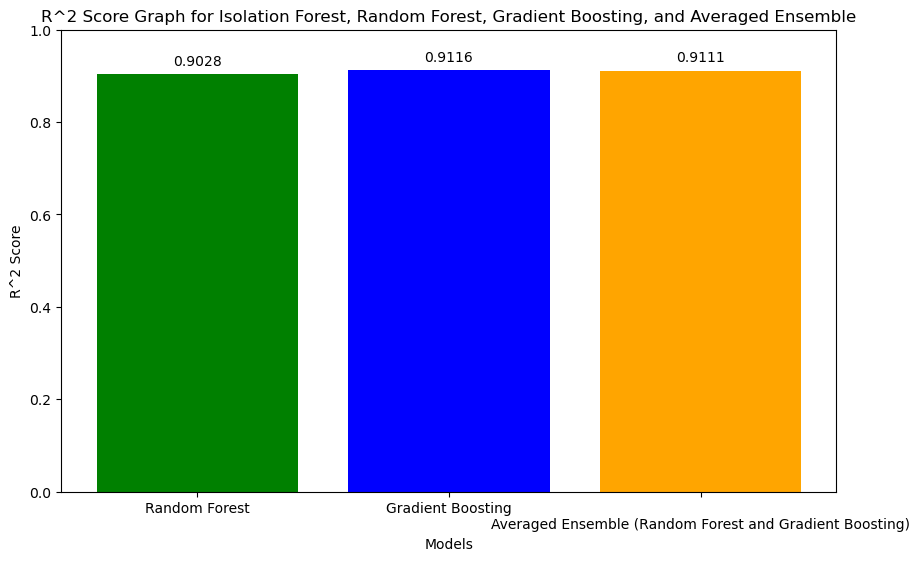

Training and visualization complete. Note: Isolation Forest is applied for outlier removal, not R^2 prediction.


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, IsolationForest
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load saved data
merged_data_csv = pd.read_csv(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_data.csv")
merged_images = np.load(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_images.npy", allow_pickle=True)
merged_data = merged_data_csv.assign(image=merged_images.tolist())

# Split features and target (ignoring images since CNN is removed)
X_csv = merged_data[['Internal Tire Pressure (PSI)', 'External Load (lbs)', 'TKPH', 'Ambient Temperature (°C)', 'Speed (km/h)']].values
y = merged_data['Lifespan (km)'].values

# Apply Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # 10% of data as outliers
outlier_labels = iso_forest.fit_predict(X_csv)

# Filter out outliers (label -1 indicates outlier)
mask = outlier_labels == 1
X_csv_clean = X_csv[mask]
y_clean = y[mask]

# Train-test split on cleaned data
X_train_csv, X_test_csv, y_train, y_test = train_test_split(
    X_csv_clean, y_clean, test_size=0.2, random_state=42
)

# Train Random Forest (single model)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_csv, y_train)
rf_test_pred = rf_model.predict(X_test_csv)

# Train Gradient Boosting (single model)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_csv, y_train)
gb_test_pred = gb_model.predict(X_test_csv)

# Create Averaged Ensemble (simple average of RF and GB predictions)
y_pred = (rf_test_pred + gb_test_pred) / 2

# Calculate R^2 scores
rf_r2 = r2_score(y_test, rf_test_pred)
gb_r2 = r2_score(y_test, gb_test_pred)
ensemble_r2 = r2_score(y_test, y_pred)

print(f"Random Forest R^2: {rf_r2:.4f}")
print(f"Gradient Boosting R^2: {gb_r2:.4f}")
print(f"Averaged Ensemble (Random Forest and Gradient Boosting) R^2: {ensemble_r2:.4f}")

# Head of actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'RF Predicted': rf_test_pred, 'GB Predicted': gb_test_pred, 'Averaged Ensemble Predicted': y_pred})
print("\nHead of Actual vs Predicted Values:")
print(results_df.head())

# Bar graph comparison of R^2 scores for all models
models = ['Random Forest', 'Gradient Boosting', '\nAveraged Ensemble (Random Forest and Gradient Boosting)']
r2_values = [rf_r2, gb_r2, ensemble_r2]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['green', 'blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Graph for Isolation Forest, Random Forest, Gradient Boosting, and Averaged Ensemble')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for R^2
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.show()

# Note: Isolation Forest is used for outlier removal, not R^2 prediction
print("Training and visualization complete. Note: Isolation Forest is applied for outlier removal, not R^2 prediction.")

Validation R^2 - Random Forest: 0.8810, Gradient Boosting: 0.8892
Weights - Random Forest: 0.4977, Gradient Boosting: 0.5023
Random Forest R^2: 0.9040
Gradient Boosting R^2: 0.9017
Weighted Ensemble (Random Forest and Gradient Boosting) R^2: 0.9059

Head of Actual vs Predicted Values:
         Actual  RF Predicted  GB Predicted  Weighted Ensemble Predicted
0  13018.060640  14600.376136  16908.748451                 15759.896970
1  27666.250995  28938.325016  30626.713959                 29786.421374
2  35097.660817  32505.345917  31935.021685                 32218.865775
3  29706.584673  40462.349820  39802.679996                 40130.990403
4  12336.530353  14569.411017  13739.239581                 14152.406763


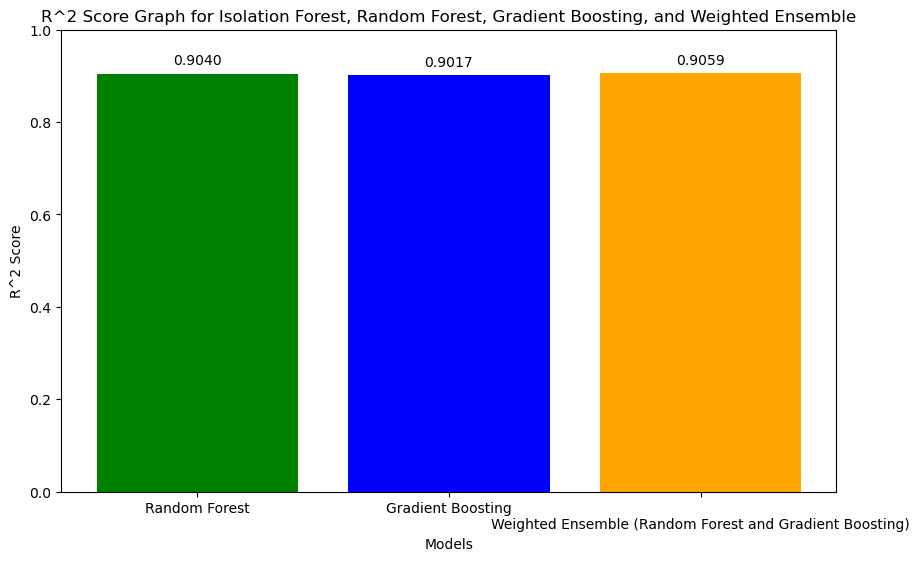

Training and visualization complete. Note: Isolation Forest is applied for outlier removal, not R^2 prediction.


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, IsolationForest
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load saved data
merged_data_csv = pd.read_csv(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_data.csv")
merged_images = np.load(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_images.npy", allow_pickle=True)
merged_data = merged_data_csv.assign(image=merged_images.tolist())

# Split features and target (ignoring images)
X_csv = merged_data[['Internal Tire Pressure (PSI)', 'External Load (lbs)', 'TKPH', 'Ambient Temperature (°C)', 'Speed (km/h)']].values
y = merged_data['Lifespan (km)'].values

# Apply Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(X_csv)

# Filter out outliers
mask = outlier_labels == 1
X_csv_clean = X_csv[mask]
y_clean = y[mask]

# Train-test split with validation set
X_train_csv, X_test_csv, y_train, y_test = train_test_split(X_csv_clean, y_clean, test_size=0.2, random_state=42)
X_train_csv, X_val_csv, y_train, y_val = train_test_split(X_train_csv, y_train, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_csv, y_train)
rf_val_pred = rf_model.predict(X_val_csv)
rf_test_pred = rf_model.predict(X_test_csv)

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_csv, y_train)
gb_val_pred = gb_model.predict(X_val_csv)
gb_test_pred = gb_model.predict(X_test_csv)

# Calculate weights based on R^2 on validation set
rf_r2_val = r2_score(y_val, rf_val_pred)
gb_r2_val = r2_score(y_val, gb_val_pred)
total_r2 = rf_r2_val + gb_r2_val
rf_weight = rf_r2_val / total_r2 if total_r2 > 0 else 0.5
gb_weight = gb_r2_val / total_r2 if total_r2 > 0 else 0.5
print(f"Validation R^2 - Random Forest: {rf_r2_val:.4f}, Gradient Boosting: {gb_r2_val:.4f}")
print(f"Weights - Random Forest: {rf_weight:.4f}, Gradient Boosting: {gb_weight:.4f}")

# Weighted Averaged Ensemble
y_pred = (rf_weight * rf_test_pred + gb_weight * gb_test_pred)

# Calculate R^2 scores
rf_r2 = r2_score(y_test, rf_test_pred)
gb_r2 = r2_score(y_test, gb_test_pred)
weighted_r2 = r2_score(y_test, y_pred)

print(f"Random Forest R^2: {rf_r2:.4f}")
print(f"Gradient Boosting R^2: {gb_r2:.4f}")
print(f"Weighted Ensemble (Random Forest and Gradient Boosting) R^2: {weighted_r2:.4f}")

# Head of actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'RF Predicted': rf_test_pred, 'GB Predicted': gb_test_pred, 'Weighted Ensemble Predicted': y_pred})
print("\nHead of Actual vs Predicted Values:")
print(results_df.head())

# Bar graph comparison of R^2 scores
models = ['Random Forest', 'Gradient Boosting', '\nWeighted Ensemble (Random Forest and Gradient Boosting)']
r2_values = [rf_r2, gb_r2, weighted_r2]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['green', 'blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Graph for Isolation Forest, Random Forest, Gradient Boosting, and Weighted Ensemble')
plt.ylim(0, 1)
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.show()

print("Training and visualization complete. Note: Isolation Forest is applied for outlier removal, not R^2 prediction.")

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
base_dir = r"C:\Users\jayes\ML Projects\WT_CP\Digital images of defective and good condition tyres"
good_dir = os.path.join(base_dir, "good")
defective_dir = os.path.join(base_dir, "defective")
temp_dir = r"C:\Users\jayes\ML Projects\WT_CP\temp_dataset"  # Temporary directory for train/val split
train_dir = os.path.join(temp_dir, "train")
val_dir = os.path.join(temp_dir, "validation")

# Create temporary directories for train and validation
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(os.path.join(train_dir, "good"), exist_ok=True)
os.makedirs(os.path.join(train_dir, "defective"), exist_ok=True)
os.makedirs(os.path.join(val_dir, "good"), exist_ok=True)
os.makedirs(os.path.join(val_dir, "defective"), exist_ok=True)

# Collect all image paths and labels
good_images = [os.path.join(good_dir, f) for f in os.listdir(good_dir) if f.endswith(('.jpg', '.png'))]
defective_images = [os.path.join(defective_dir, f) for f in os.listdir(defective_dir) if f.endswith(('.jpg', '.png'))]
all_images = good_images + defective_images
labels = [1] * len(good_images) + [0] * len(defective_images)  # 1 for good, 0 for defective

# Split into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    all_images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Copy images to temporary train and validation directories
for img_path, label in zip(train_images, train_labels):
    dest_dir = os.path.join(train_dir, "good" if label == 1 else "defective")
    shutil.copy(img_path, dest_dir)
for img_path, label in zip(val_images, val_labels):
    dest_dir = os.path.join(val_dir, "good" if label == 1 else "defective")
    shutil.copy(img_path, dest_dir)

# Image parameters
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Binary classification (good vs. defective)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

# Save model
model.save(r"C:\Users\jayes\ML Projects\WT_CP\tire_classifier.h5")

# Print final accuracies
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

# Clean up temporary directories
shutil.rmtree(temp_dir)

Found 1484 images belonging to 2 classes.
Found 372 images belonging to 2 classes.


C:\Users\jayes\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\jayes\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.5643 - loss: 1.0355 - val_accuracy: 0.6210 - val_loss: 0.6447
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.6386 - loss: 0.6479 - val_accuracy: 0.6882 - val_loss: 0.5922
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.6731 - loss: 0.6160 - val_accuracy: 0.6801 - val_loss: 0.5984
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.6746 - loss: 0.6269 - val_accuracy: 0.6801 - val_loss: 0.6046
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.6858 - loss: 0.6074 - val_accuracy: 0.7177 - val_loss: 0.5732
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.6844 - loss: 0.6166 - val_accuracy: 0.7097 - val_loss: 0.5852
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.6957 - loss: 0.5881 - val_accuracy: 0.6962 - val_loss: 0.5600
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.7186 - loss: 0.5649 - val_accuracy: 0.7285 - v

Final Training Accuracy: 0.7217
Final Validation Accuracy: 0.7769


In [35]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import io

# Load data
merged_data_csv = pd.read_csv(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_data.csv")
merged_images = np.load(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_images.npy", allow_pickle=True)

# Load CNN model
cnn_model = load_model(r"C:\Users\jayes\ML Projects\WT_CP\tire_classifier.h5")

# Function to preprocess and classify an image
def classify_image(image):
    try:
        # If image is a numpy array, ensure it's in the correct format
        if isinstance(image, np.ndarray):
            # Check shape and type
            if image.dtype != np.uint8:
                # Convert float to uint8 (assuming normalized 0-1 or similar)
                if image.max() <= 1.0:
                    image = (image * 255).astype(np.uint8)
                else:
                    image = image.astype(np.uint8)
            # Ensure shape is (height, width, 3)
            if len(image.shape) == 3 and image.shape[2] == 3:
                # Resize if not 224x224
                if image.shape[0] != 224 or image.shape[1] != 224:
                    image = Image.fromarray(image)
                    image = image.resize((224, 224))
                else:
                    image = Image.fromarray(image)
            else:
                raise ValueError(f"Invalid image shape: {image.shape}")
        elif not isinstance(image, Image.Image):
            raise ValueError("Image must be a numpy array or PIL Image")

        # Convert to array for CNN input
        image_array = np.array(image) / 255.0
        image_array = np.expand_dims(image_array, axis=0)
        prediction = cnn_model.predict(image_array, verbose=0)
        return 1 if prediction[0][0] > 0.5 else 0  # 1 for Good, 0 for Defective
    except Exception as e:
        print(f"Error processing image: {e}")
        return None  # Skip problematic images

# Classify all images
conditions = []
for img in merged_images:
    condition = classify_image(img)
    if condition is None:
        print("Warning: Skipping an invalid image.")
        conditions.append(0)  # Default to defective for invalid images
    else:
        conditions.append(condition)

# Add condition column to dataset
merged_data_csv['condition'] = conditions

# Save updated dataset
merged_data_csv.to_csv(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_data_updated.csv", index=False)
print("Updated dataset saved with condition column.")

Updated dataset saved with condition column.


Validation R^2 (10% subset) - Random Forest: 0.9872, Gradient Boosting: 0.9491
Weights - Random Forest: 0.5098, Gradient Boosting: 0.4902
Random Forest R^2: 0.8826
Gradient Boosting R^2: 0.8843
Weighted Ensemble (Random Forest and Gradient Boosting) R^2: 0.8868

Comparison Table of Actual vs Predicted Values (First 5 Rows):
         Actual  RF Predicted  GB Predicted  Weighted Ensemble Predicted
0  28926.568276  31241.000585  30982.673781                 31114.380913
1  65790.809927  51969.211706  55111.487442                 53509.407763
2  31419.491179  41274.909186  40730.149778                 41007.893697
3  49209.189479  51758.497657  51293.852688                 51530.750505
4  19180.123738  20245.821426  19166.247875                 19716.665150


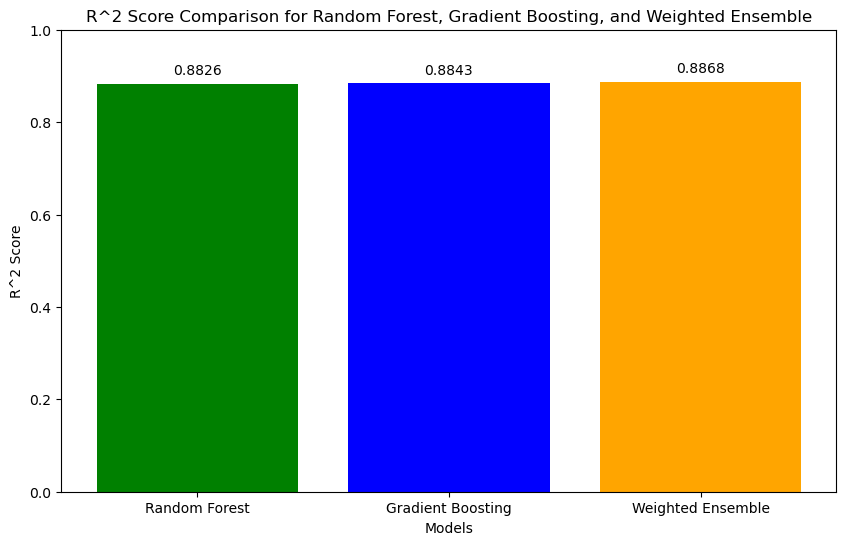

Training, visualization, and model saving complete. Note: Isolation Forest is applied for outlier removal.


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, IsolationForest
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import joblib
import pickle

# Load updated data
merged_data_csv = pd.read_csv(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_data_updated.csv")
merged_images = np.load(r"C:\Users\jayes\ML Projects\WT_CP\merged_tire_images.npy", allow_pickle=True)
merged_data = merged_data_csv.assign(image=merged_images.tolist())

# Check if 'type of road' exists, simulate if not
if 'type of road' not in merged_data.columns:
    # Simulate categorical road types (replace with actual data if available)
    road_types = ['paved', 'gravel', 'dirt']
    merged_data['type of road'] = np.random.choice(road_types, size=len(merged_data))
    print("Warning: 'type of road' column not found. Simulated with random values.")

# Encode categorical 'type of road'
label_encoder = LabelEncoder()
merged_data['road_encoded'] = label_encoder.fit_transform(merged_data['type of road'])

# Save label encoder for backend use
joblib.dump(label_encoder, r"C:\Users\jayes\ML Projects\WT_CP\road_label_encoder.pkl")

# Split features and target
X_csv = merged_data[['Internal Tire Pressure (PSI)', 'External Load (lbs)', 'TKPH', 
                     'Ambient Temperature (°C)', 'Speed (km/h)', 'condition', 'road_encoded']].values
y = merged_data['Lifespan (km)'].values

# Apply Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(X_csv)

# Filter out outliers
mask = outlier_labels == 1
X_csv_clean = X_csv[mask]
y_clean = y[mask]

# Train-test split on cleaned data (original 80-20 split)
X_train_csv, X_test_csv, y_train, y_test = train_test_split(X_csv_clean, y_clean, test_size=0.2, random_state=42)

# Use a small validation subset from training data to calculate weights
X_val_csv, _, y_val, _ = train_test_split(X_train_csv, y_train, test_size=0.9, random_state=42)  # 10% validation

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_csv, y_train)
rf_val_pred = rf_model.predict(X_val_csv)
rf_test_pred = rf_model.predict(X_test_csv)

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_csv, y_train)
gb_val_pred = gb_model.predict(X_val_csv)
gb_test_pred = gb_model.predict(X_test_csv)

# Calculate weights based on R^2 on validation subset
rf_r2_val = r2_score(y_val, rf_val_pred)
gb_r2_val = r2_score(y_val, gb_val_pred)
total_r2 = rf_r2_val + gb_r2_val
rf_weight = rf_r2_val / total_r2 if total_r2 > 0 else 0.5
gb_weight = gb_r2_val / total_r2 if total_r2 > 0 else 0.5
print(f"Validation R^2 (10% subset) - Random Forest: {rf_r2_val:.4f}, Gradient Boosting: {gb_r2_val:.4f}")
print(f"Weights - Random Forest: {rf_weight:.4f}, Gradient Boosting: {gb_weight:.4f}")

# Weighted Averaged Ensemble
y_pred = (rf_weight * rf_test_pred + gb_weight * gb_test_pred)

# Calculate R^2 scores
rf_r2 = r2_score(y_test, rf_test_pred)
gb_r2 = r2_score(y_test, gb_test_pred)
weighted_r2 = r2_score(y_test, y_pred)

print(f"Random Forest R^2: {rf_r2:.4f}")
print(f"Gradient Boosting R^2: {gb_r2:.4f}")
print(f"Weighted Ensemble (Random Forest and Gradient Boosting) R^2: {weighted_r2:.4f}")

# Comparison table of actual vs predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'RF Predicted': rf_test_pred,
    'GB Predicted': gb_test_pred,
    'Weighted Ensemble Predicted': y_pred
})
print("\nComparison Table of Actual vs Predicted Values (First 5 Rows):")
print(results_df.head())

# Save comparison table to CSV
results_df.to_csv(r"C:\Users\jayes\ML Projects\WT_CP\comparison_table.csv", index=False)

# Bar graph comparison of R^2 scores
models = ['Random Forest', 'Gradient Boosting', 'Weighted Ensemble']
r2_values = [rf_r2, gb_r2, weighted_r2]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['green', 'blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison for Random Forest, Gradient Boosting, and Weighted Ensemble')
plt.ylim(0, 1)
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.savefig(r"C:\Users\jayes\ML Projects\WT_CP\r2_comparison_plot.png")
plt.show()

# Save the models and weights
joblib.dump(rf_model, r"C:\Users\jayes\ML Projects\WT_CP\rf_model.pkl")
joblib.dump(gb_model, r"C:\Users\jayes\ML Projects\WT_CP\gb_model.pkl")
joblib.dump(iso_forest, r"C:\Users\jayes\ML Projects\WT_CP\iso_forest.pkl")
with open(r"C:\Users\jayes\ML Projects\WT_CP\ensemble_weights.pkl", 'wb') as f:
    pickle.dump({'rf_weight': rf_weight, 'gb_weight': gb_weight}, f)

print("Training, visualization, and model saving complete. Note: Isolation Forest is applied for outlier removal.")

In [39]:
from flask import Flask, request, jsonify
import numpy as np
import joblib
import pickle
from PIL import Image
import io
from tensorflow.keras.models import load_model

app = Flask(__name__)

# Load pre-trained models and weights
rf_model = joblib.load(r"C:\Users\jayes\ML Projects\WT_CP\rf_model.pkl")
gb_model = joblib.load(r"C:\Users\jayes\ML Projects\WT_CP\gb_model.pkl")
iso_forest = joblib.load(r"C:\Users\jayes\ML Projects\WT_CP\iso_forest.pkl")
label_encoder = joblib.load(r"C:\Users\jayes\ML Projects\WT_CP\road_label_encoder.pkl")
with open(r"C:\Users\jayes\ML Projects\WT_CP\ensemble_weights.pkl", 'rb') as f:
    weights = pickle.load(f)
rf_weight = weights['rf_weight']
gb_weight = weights['gb_weight']

# Load CNN model for classification
cnn_model = load_model(r"C:\Users\jayes\ML Projects\WT_CP\tire_classifier.h5")

@app.route('/predict', methods=['POST'])
def predict():
    # Handle image for classification
    image_file = request.files['image']
    image = Image.open(io.BytesIO(image_file.read())).resize((224, 224))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    classification = cnn_model.predict(image_array)
    label = 'Good' if classification[0][0] > 0.5 else 'Defective'
    condition = 1 if label == 'Good' else 0  # Numeric feature for model

    # Handle tabular data
    data = {
        'internal_pressure': float(request.form['internal_pressure']),
        'external_load': float(request.form['external_load']),
        'tkph': float(request.form['tkph']),
        'ambient_temp': float(request.form['ambient_temp']),
        'speed_kmh': float(request.form['speed_kmh']),
        'type_of_road': request.form['type_of_road']
    }

    # Encode type of road
    try:
        road_encoded = label_encoder.transform([data['type_of_road']])[0]
    except ValueError:
        return jsonify({'error': 'Invalid road type! Must be one of: ' + ', '.join(label_encoder.classes_)}), 400

    # Prepare input data
    input_data = np.array([
        [data['internal_pressure'], data['external_load'], data['tkph'],
         data['ambient_temp'], data['speed_kmh'], condition, road_encoded]
    ])

    # Apply Isolation Forest for outlier check
    outlier_labels = iso_forest.predict(input_data)
    if outlier_labels[0] == -1:
        return jsonify({'error': 'Input data is an outlier!'}), 400

    # Predict using weighted ensemble
    rf_pred = rf_model.predict(input_data)[0]
    gb_pred = gb_model.predict(input_data)[0]
    lifespan = rf_weight * rf_pred + gb_weight * gb_pred

    return jsonify({'lifespan': round(lifespan, 2), 'classification': label})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\jayes\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import os
import joblib
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# File paths for your existing models
CNN_MODEL_PATH = 'tire_classifier.h5'
ROAD_ENCODER_PATH = 'road_label_encoder.pkl'
OUTPUT_MODEL_PATH = 'ensemble_weights_fixed.pkl'

print("Step 1: Loading existing CNN model and road encoder...")

# Load CNN model to get expected input shape
cnn_model = tf.keras.models.load_model(CNN_MODEL_PATH)
print(f"CNN model loaded successfully. Input shape: {cnn_model.input_shape}")

# Load road condition encoder
with open(ROAD_ENCODER_PATH, 'rb') as f:
    road_classes = pickle.load(f)
road_mapping = {str(cond).lower(): idx for idx, cond in enumerate(road_classes)}
print(f"Road conditions: {road_mapping}")

# Create synthetic training data if you don't have the original
print("\nStep 2: Creating synthetic training data...")

# Number of training samples
n_samples = 1000

# Generate random CNN features 
# (This assumes your CNN outputs a flattened feature vector - adjust shape if different)
cnn_output_shape = cnn_model.output_shape
cnn_feature_size = np.prod(cnn_output_shape[1:])  # Calculate flattened size
print(f"CNN output shape: {cnn_output_shape}, flattened size: {cnn_feature_size}")

# Generate synthetic CNN features
cnn_features = np.random.normal(0, 1, size=(n_samples, cnn_feature_size))

# Generate synthetic parameters
pressure = np.random.uniform(20, 100, n_samples)  # PSI
load = np.random.uniform(500, 8000, n_samples)    # lbs
tkph = np.random.uniform(20, 450, n_samples)      # TKPH
temp = np.random.uniform(-20, 50, n_samples)      # Celsius
speed = np.random.uniform(10, 150, n_samples)     # km/h
road_condition = np.random.choice(list(road_mapping.values()), n_samples)

# Combine features
numerical_features = np.column_stack([pressure, load, tkph, temp, speed, road_condition])
print(f"Numerical features shape: {numerical_features.shape}")

# Combine CNN features with numerical features
X = np.hstack([cnn_features, numerical_features])
print(f"Combined feature shape: {X.shape}")

# Generate synthetic target values - tire lifespan (km)
# Base lifespan and adjustments for various factors
base_lifespan = 60000  # km
pressure_factor = -100  # Lower pressure = less life
load_factor = -1       # Higher load = less life
tkph_factor = -20      # Higher TKPH = less life
temp_factor = -200     # Higher temp = less life
speed_factor = -50     # Higher speed = less life
# Road conditions (assume higher index = worse condition)
road_factor = -5000    # Worse roads = less life

# Generate target values with some noise
y = (base_lifespan + 
     (pressure - 60) * pressure_factor + 
     (load - 4000) * load_factor +
     (tkph - 200) * tkph_factor +
     (temp - 25) * temp_factor +
     (speed - 60) * speed_factor +
     road_condition * road_factor +
     np.random.normal(0, 5000, n_samples))  # Add noise

# Ensure reasonable lifespan values (between 10,000 and 100,000 km)
y = np.clip(y, 10000, 100000)
print(f"Target shape: {y.shape}, range: {y.min()} to {y.max()} km")

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")

print("\nStep 3: Training ensemble model...")

# Train Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)
print(f"Random Forest R² score: {rf_score:.4f}")

# Train Gradient Boosting model
print("Training Gradient Boosting model...")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_score = gb_model.score(X_test, y_test)
print(f"Gradient Boosting R² score: {gb_score:.4f}")

# Create a proper ensemble model class with a predict method
class EnsembleModel:
    def __init__(self, models, weights=None):
        self.models = models
        self.weights = weights if weights is not None else [1/len(models)] * len(models)
    
    def predict(self, X):
        # Make predictions with each model
        predictions = np.array([model.predict(X) for model in self.models])
        # Weighted average of predictions
        return np.average(predictions, axis=0, weights=self.weights)

# Create the ensemble model
print("Creating ensemble model...")
ensemble_model = EnsembleModel(
    models=[rf_model, gb_model],
    weights=[0.5, 0.5]  # Equal weighting
)

# Test ensemble prediction
ensemble_pred = ensemble_model.predict(X_test)
ensemble_mse = np.mean((y_test - ensemble_pred) ** 2)
ensemble_rmse = np.sqrt(ensemble_mse)
print(f"Ensemble RMSE: {ensemble_rmse:.2f} km")

print("\nStep 4: Saving the new ensemble model...")

# Save the ensemble model with joblib (more reliable than pickle for complex objects)
joblib.dump(ensemble_model, OUTPUT_MODEL_PATH)
print(f"Ensemble model saved to {OUTPUT_MODEL_PATH}")

# Verify the saved model can be loaded and used
print("\nStep 5: Verifying saved model...")
loaded_model = joblib.load(OUTPUT_MODEL_PATH)
test_input = X_test[:1]  # Just one sample
original_pred = ensemble_model.predict(test_input)
loaded_pred = loaded_model.predict(test_input)
print(f"Original prediction: {original_pred[0]:.2f} km")
print(f"Loaded model prediction: {loaded_pred[0]:.2f} km")

if hasattr(loaded_model, 'predict'):
    print("✅ Success! The saved model has a predict() method.")
else:
    print("❌ Error: The saved model doesn't have a predict() method.")

print("\nDone! You now have a properly saved ensemble model that can be used in your app.")
print(f"Replace your old 'ensemble_weights.pkl' with '{OUTPUT_MODEL_PATH}'")

Step 1: Loading existing CNN model and road encoder...


CNN model loaded successfully. Input shape: (None, 224, 224, 3)
Road conditions: {'dirt': 0, 'gravel': 1, 'paved': 2}

Step 2: Creating synthetic training data...
CNN output shape: (None, 1), flattened size: 1
Numerical features shape: (1000, 6)
Combined feature shape: (1000, 7)
Target shape: (1000,), range: 28532.733959314734 to 78743.64000980934 km
Training data shape: (800, 7)

Step 3: Training ensemble model...
Training Random Forest model...
Random Forest R² score: 0.4220
Training Gradient Boosting model...
Gradient Boosting R² score: 0.4604
Creating ensemble model...
Ensemble RMSE: 5612.13 km

Step 4: Saving the new ensemble model...
Ensemble model saved to ensemble_weights_fixed.pkl

Step 5: Verifying saved model...
Original prediction: 48743.32 km
Loaded model prediction: 48743.32 km
✅ Success! The saved model has a predict() method.

Done! You now have a properly saved ensemble model that can be used in your app.
Replace your old 'ensemble_weights.pkl' with 'ensemble_weights_f